### exercise 6: beyond linearity 

### task 1: polynomial regression 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.stats.outliers_influence import summary_table
from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [2]:
Wages = pd.read_csv(r'C:\Users\Chijun Zhang\Documents\jupyter\machine learning exercise\datasets\Wage.csv')
Wages.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [3]:
Wages = Wages.rename(columns={'Unnamed: 0': 'id'})
print(pd.isnull(Wages).any())

id            False
year          False
age           False
sex           False
maritl        False
race          False
education     False
region        False
jobclass      False
health        False
health_ins    False
logwage       False
wage          False
dtype: bool


$Wage=\beta_0 + \beta_1*age + \beta_2*age^2 + \beta_3*age^3 + \beta_4*age^4$

In [4]:
model = smf.ols('wage ~ age + I(age**2)+ I(age**3) + I(age**4)', data=Wages)
estimate = model.fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Thu, 25 Aug 2022   Prob (F-statistic):           2.77e-57
Time:                        00:33:39   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -184.1542     60.040     -3.067      

In [5]:
new_ages = np.linspace(Wages.age.min(), Wages.age.max(), num=1000)

predictions = estimate.predict(exog=dict(age = new_ages))

std_err = np.array([])
for age in new_ages:
    
    poly_age = np.array([[1,age,age**2,age**3,age**4]])
     
    var = np.dot(poly_age, np.dot(estimate.cov_params(), poly_age.T))
    
    std_err = np.append(std_err, np.sqrt(var))
    
crit_value = stats.t.isf(.05/2,len(Wages)-1)

widths = crit_value*std_err

ui = predictions + widths
li = predictions - widths

In [6]:
simpleTable, data, column_names = summary_table(estimate, alpha=0.05)

print('column_names: ', column_names)

ci_low_table, ci_high_table = data[:,4:6].T

column_names:  ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


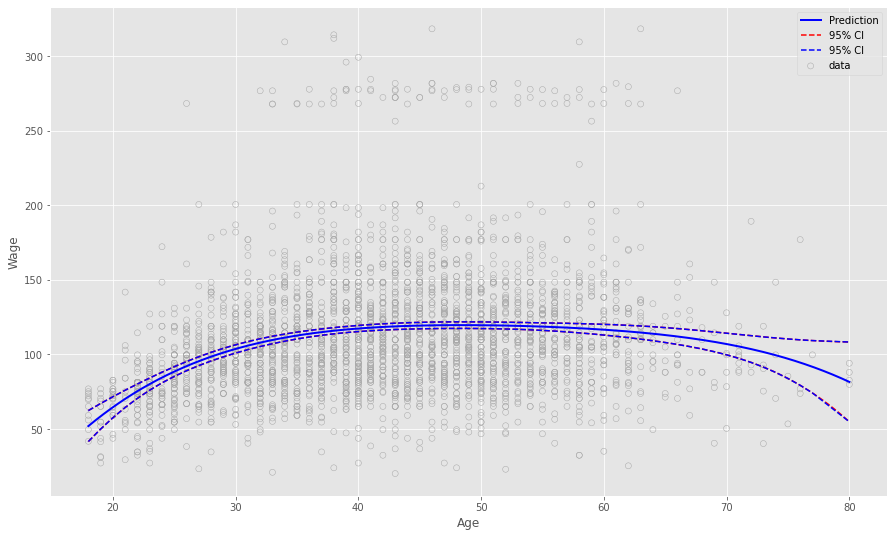

In [7]:
fig, ax = plt.subplots(1,1, figsize = (15,9))
ax.scatter(Wages.age, Wages.wage, facecolors='none', edgecolors='darkgray', label="data")
ax.plot(new_ages,predictions, 'b-', lw=2, label='Prediction')

ax.plot(new_ages, li, color='r', linestyle='--', label='95% CI')
ax.plot(new_ages, ui, color= 'r', linestyle='--')


order = np.argsort(Wages.age.values)
ax.plot(Wages.age.values[order], ci_low_table[order], 'b--', label='95% CI')
ax.plot(Wages.age.values[order], ci_high_table[order], 'b--')


ax.legend(loc='best');
ax.set_xlabel('Age');
ax.set_ylabel('Wage');

In [8]:
est1 = smf.ols('wage ~ age', data=Wages).fit()
est2 = smf.ols('wage ~ age + I(age**2)', data=Wages).fit()
est3 = smf.ols('wage ~ age + I(age**2)+ I(age**3)', data=Wages).fit()
est4 = smf.ols('wage ~ age + I(age**2)+ I(age**3) + I(age**4)', data=Wages).fit()
est5 = smf.ols('wage ~ age + I(age**2)+ I(age**3) + I(age**4) + I(age**5)', data=Wages).fit()


anova=sm.stats.anova_lm(est1,est2,est3,est4,est5)
print(anova)

   df_resid           ssr  df_diff        ss_diff           F        Pr(>F)
0    2998.0  5.022216e+06      0.0            NaN         NaN           NaN
1    2997.0  4.793430e+06      1.0  228786.010128  143.593107  2.363850e-32
2    2996.0  4.777674e+06      1.0   15755.693664    9.888756  1.679202e-03
3    2995.0  4.771604e+06      1.0    6070.152124    3.809813  5.104620e-02
4    2994.0  4.770322e+06      1.0    1282.563017    0.804976  3.696820e-01
